<a href="https://colab.research.google.com/drive/1HCKypkHh56cJ3okTKr3EQpERiCiPt9D2?usp=drive_link" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **JS04 - Klasterisasi**
---

## **Praktikum 1**
---
Download dataset `Iris.csv` terlebih dahulu

[Iris.csv](https://3041032130-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F5CvtE8Xh9b75jKUaRr5Y%2Fuploads%2FxUePALvHkIiJfbEFZdaJ%2FIris.csv?alt=media&token=bcc1e3f9-d7be-4194-8c56-bb48e93b6800)


**KMeans**

KMeans adalah satu metode unsupervised learning pada machine learning. Metode ini menentukan jumlah cluster sesuai dengan jumlah yang dipilih. Proses KMeans secara manual, dapat dilihat pada tautan berikut,

[Perhitungan Manual KMeans](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2F16C2HxTFicQ5tS7aXc1Uvlu1kyvk20LSA_P-E2p47kLY%2Fedit%3Fusp%3Dsharing)

Pada modul jobsheet ini, kita akan langsung mempraktikkan pembuatan model KMeans dengan menggunakan python. Untuk modul pertama ini, kita akan menggunakan contoh kasus yang sederhana, yaitu dengan menggunakan dataset iris. Sedangkan untuk modul kedua, kita akan melakukan clustering dengan lebih advance, yaitu reduksi warna dengan data gambar

In [ ]:
from google.colab import files
uploaded = files.upload() # upload dataset

Saving Iris.csv to Iris (5).csv


In [ ]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [ ]:
print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


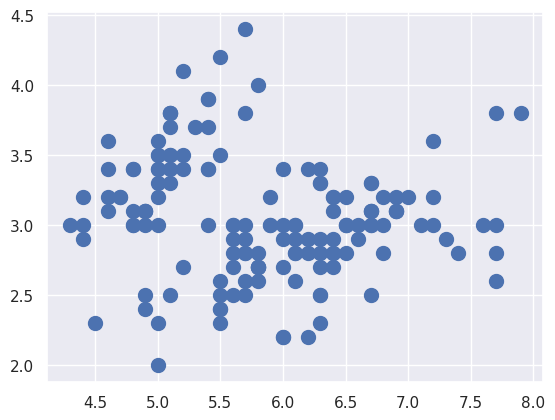

In [ ]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

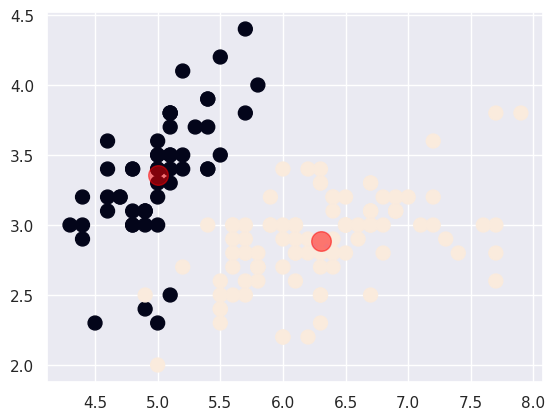

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


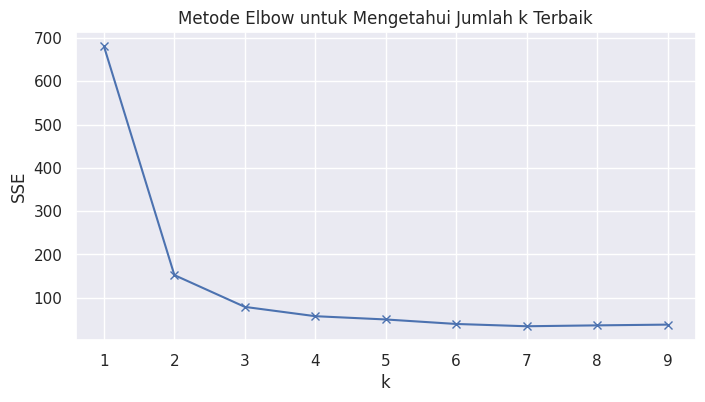

In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=57.4732732654949
k=5; SSE=49.91714055829228
k=6; SSE=39.51795077185665
k=7; SSE=34.246992541740816
k=8; SSE=36.28039136165059
k=9; SSE=38.01399219727644
